In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

In [ ]:
start= "2020-01-01"
end = "2023-12-31"

# **Task 1**

### **1-Loading Data Functions**



In [ ]:
def data_sp500(start_date, end_date):
    tickers="^GSPC"
    data = yf.download(tickers, start=start_date, end=end_date)
    return data

def stocks_data(start_date, end_date):
    stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "META",
              "TSLA", "JPM", "JNJ", "NVDA", "XOM"]  # Example stocks
    tickers= stocks
    data = yf.download(tickers, start=start_date, end=end_date)
    return data

In [ ]:
start= "2020-01-01"
end = "2023-12-31"

In [ ]:
data_stocks=stocks_data(start, end)

/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed


### **2-Average Daily Return Function**

In [ ]:
def Average_daily_returns(start_date, end_date):

  Close_prices_stocks_data=stocks_data(start_date, end_date)['Close']
  Close_prices_data_Sp500=data_sp500(start_date, end_date)['Close']

  Daily_return_Sp500=Close_prices_data_Sp500.pct_change()
  Daily_return_Sp500=Daily_return_Sp500.add_suffix("_Return")
  Mean_Daily_return_Sp500=Daily_return_Sp500.mean()

  Daily_return_stoks_data=Close_prices_stocks_data.pct_change()
  Daily_return_stoks_data=Daily_return_stoks_data.add_suffix('_Return')
  Mean_Daily_return_stocks_data=Daily_return_stoks_data.mean()

  return Mean_Daily_return_Sp500, Mean_Daily_return_stocks_data, Daily_return_stoks_data, Daily_return_Sp500

/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-2959347032.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


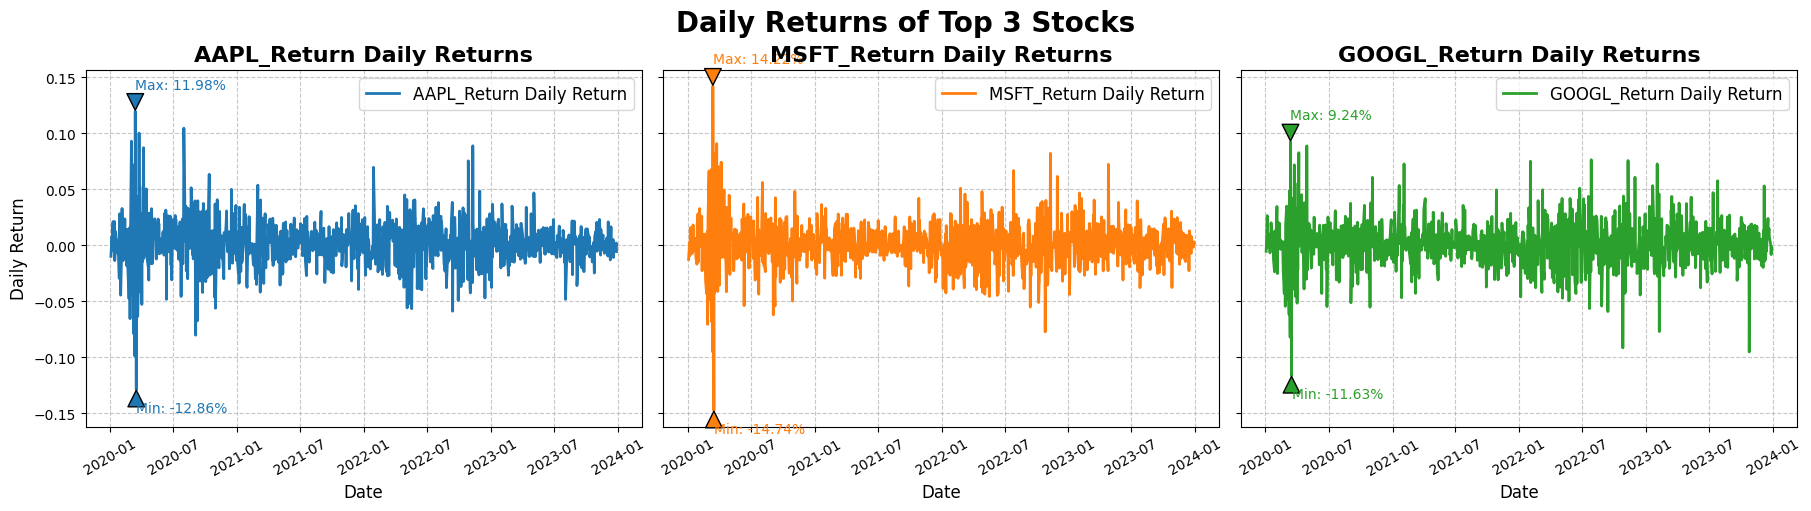

In [ ]:
import matplotlib.pyplot as plt

def plot_top3_returns(returns, stocks=['AAPL', 'MSFT', 'GOOGL']):
    # Custom color palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True, constrained_layout=True)

    for i, stock in enumerate(stocks):
        ax = axes[i]
        ax.plot(returns.index, returns[stock], color=colors[i], linewidth=2, label=f'{stock} Daily Return')
        ax.set_title(f'{stock} Daily Returns', fontsize=16, fontweight='bold')
        ax.set_xlabel('Date', fontsize=12)
        if i == 0:
            ax.set_ylabel('Daily Return', fontsize=12)
        ax.legend(loc='upper right', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)

        # Annotate max and min returns
        max_idx = returns[stock].idxmax()
        min_idx = returns[stock].idxmin()
        ax.annotate(f'Max: {returns[stock].max():.2%}', xy=(max_idx, returns[stock].max()),
                    xytext=(max_idx, returns[stock].max()+0.02),
                    arrowprops=dict(facecolor=colors[i], shrink=0.05), fontsize=10, color=colors[i])
        ax.annotate(f'Min: {returns[stock].min():.2%}', xy=(min_idx, returns[stock].min()),
                    xytext=(min_idx, returns[stock].min()-0.02),
                    arrowprops=dict(facecolor=colors[i], shrink=0.05), fontsize=10, color=colors[i])

        ax.tick_params(axis='x', rotation=30)

    fig.suptitle('Daily Returns of Top 3 Stocks', fontsize=20, fontweight='bold')
    plt.show()

# Usage:
# plot_top3_returns(returns)

# Example usage:
plot_top3_returns(Average_daily_returns(start, end)[2],  stocks=['AAPL_Return', 'MSFT_Return', 'GOOGL_Return'])


In [ ]:
Average_daily_returns(start, end)[2]['AAPL_Return'].values

/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-2959347032.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


array([        nan, -0.00972226,  0.0079686 , ...,  0.00051787,
        0.00222634, -0.00542419])

### **3-Daily Volatility Function / Satndard Deviation**

In [ ]:
def Volatility_returns(start_date, end_date):

  Close_prices_stocks_data=stocks_data(start_date, end_date)['Close']
  Close_prices_data_Sp500=data_sp500(start_date, end_date)['Close']

  Daily_return_Sp500=Close_prices_data_Sp500.pct_change()

  Volatility_return_Sp500=Daily_return_Sp500.std()

  Daily_return_stoks_data=Close_prices_stocks_data.pct_change()
  Volatility_return_stocks_data=Daily_return_stoks_data.std()

  return Volatility_return_Sp500, Volatility_return_stocks_data

In [ ]:
Volatility_returns(start, end)

/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-2959347032.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


(Ticker
 ^GSPC    0.014497
 dtype: float64,
 Ticker
 AAPL     0.021146
 AMZN     0.023741
 GOOGL    0.021124
 JNJ      0.013004
 JPM      0.021685
 META     0.029469
 MSFT     0.020546
 NVDA     0.034161
 TSLA     0.042902
 XOM      0.023452
 dtype: float64)

### **4-Maximum Drawdowns Function**

In [ ]:
def Maximum_Drawdowns(start_date, end_date):

  Close_prices_stocks_data=stocks_data(start_date, end_date)['Close']
  Close_prices_data_Sp500=data_sp500(start_date, end_date)['Close']

  Tickers_stocks_data_keys=Close_prices_stocks_data.keys()
  Tickers_stocks_data_Sp500_keys= Close_prices_data_Sp500.keys()

  def max_drawdown(series):
    running_max = series.cummax()
    drawdowns = (series - running_max) / running_max
    return drawdowns.min()

  drawdowns = {}


  for ticker in Tickers_stocks_data_keys:
    drawdowns[ticker] = max_drawdown(Close_prices_stocks_data[ticker])

  for item in Tickers_stocks_data_Sp500_keys:
    drawdowns[item]=max_drawdown(Close_prices_data_Sp500[item])

  # Display maximum drawdown for each stock
  result = pd.DataFrame.from_dict(drawdowns, orient='index', columns=['Max Drawdown'])
  return result

In [ ]:
Maximum_Drawdowns(start, end)

/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-2959347032.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


,Max Drawdown
AAPL,-0.314273
AMZN,-0.561453
GOOGL,-0.443201
JNJ,-0.273663
JPM,-0.436265
META,-0.767361
MSFT,-0.371485
NVDA,-0.663351
TSLA,-0.736322
XOM,-0.550049


### **5-Tracking Error Function**

In [ ]:
def Tracking_Error(start_date, end_date):


  # Calling the returns table gotten from previous functions
  Daily_return_Sp500=Average_daily_returns(start_date, end_date)[3]
  Daily_return_stoks_data=Average_daily_returns(start_date, end_date)[2]

  """ We know that the first element of each column in these previous tables will won't be numbers, so we need to drop them"""
  Daily_return_Sp500=Daily_return_Sp500.dropna()
  Daily_return_stoks_data=Daily_return_stoks_data.dropna()

  Tickers_stocks_data_keys=Daily_return_stoks_data.keys()
  Daily_return_Sp500_values=Daily_return_Sp500['^GSPC_Return']

  Tracking_errors= {}
  for ticker in Tickers_stocks_data_keys:
    Tracking_errors[ticker]=np.std(Daily_return_stoks_data[ticker]-Daily_return_Sp500_values, ddof=1)
  Tracking_errors=pd.DataFrame.from_dict(Tracking_errors, orient='index', columns=['Tracking Errors'])
  Tracking_errors.index = pd.Index([idx.replace('_Return', '_TE') for idx in Tracking_errors.index])

  return Tracking_errors


In [ ]:
Tracking_Error(start, end)

/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-2959347032.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-2959347032.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


,Tracking Errors
AAPL_TE,0.012540
AMZN_TE,0.018277
GOOGL_TE,0.013548
JNJ_TE,0.012627
JPM_TE,0.014747
META_TE,0.023162
MSFT_TE,0.011791
NVDA_TE,0.025832
TSLA_TE,0.037588
XOM_TE,0.019746


### **6-Sharp Ratio Function**

In [ ]:
def Sharp_Ratio(start, end):

  Rf=0.035 # Risk Free rate

  risk_free_annual = 0.035
  risk_free_daily = (1 + risk_free_annual)**(1/252) - 1

  Average_returns= Average_daily_returns(start, end)
  Volatility_daily_returns=Volatility_returns(start, end)
  Sharp_ratio_SP500=(Average_returns[0].values-risk_free_daily)/Volatility_daily_returns[0].values
  Sharp_ratio_Stocks_data=(Average_returns[1].values-risk_free_daily)/Volatility_daily_returns[1].values
  Sharp_Ratio_all=[0 for i in range(len(Sharp_ratio_Stocks_data)+1)]
  for i in range(len(Sharp_ratio_Stocks_data)):
    Sharp_Ratio_all[i]=Sharp_ratio_Stocks_data[i]

  Sharp_Ratio_all[-1]=Sharp_ratio_SP500[0]
  stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "META",
              "TSLA", "JPM", "JNJ", "NVDA", "XOM", "^GSPC"]

  Sharp_Ratio_all=pd.DataFrame({stocks[i]:[Sharp_Ratio_all[i]] for i in range(len(stocks))})
  return Sharp_Ratio_all

In [ ]:
Sharp_Ratio(start, end)

/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-2959347032.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-2959347032.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,GOOGL,AMZN,META,TSLA,JPM,JNJ,NVDA,XOM,^GSPC
0,0.049657,0.025832,0.03773,0.009655,0.018633,0.028044,0.046633,0.074589,0.068371,0.029351,0.024037


### **7- VaR and CVaR Function**

In [ ]:
def VaR_and_CVaR(start, end):
  # For a 95% confidence interval

  z=-1.65
  Average_returns= Average_daily_returns(start, end)
  Volatility_daily_returns=Volatility_returns(start, end)
  VaR_SP500=Average_returns[0].values+z*Volatility_daily_returns[0].values
  VaR_Stocks_data=Average_returns[1].values+z*Volatility_daily_returns[1].values
  VaR_all=[0 for i in range(len(VaR_Stocks_data)+1)]

  for i in range(len(VaR_Stocks_data)):
     VaR_all[i]=VaR_Stocks_data[i]

  VaR_all[-1]=VaR_SP500[0]

  Close_prices_stocks_data=stocks_data(start, end)['Close']
  Close_prices_data_Sp500=data_sp500(start, end)['Close']

  Daily_return_Sp500=Close_prices_data_Sp500.pct_change().dropna()
  #Daily_return_Sp500=Daily_return_Sp500.add_suffix("_Return").dropna()


  Daily_return_stoks_data=Close_prices_stocks_data.pct_change().dropna()
  #Daily_return_stoks_data=Daily_return_stoks_data.add_suffix('_Return')()

  stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "META",
              "TSLA", "JPM", "JNJ", "NVDA", "XOM", "^GSPC"]
  VaR_all=pd.DataFrame({stocks[i]:[VaR_all[i]] for i in range(len(stocks))})
  L=[]

  CVaR_values=[]
  for item in stocks[:-1]:
    for item1 in Daily_return_stoks_data[item].values:
      if item1<=VaR_all[item].values:
        L.append(item1)
    CVaR_values.append(np.array(L).mean())

  L1=[item2 for item2 in Daily_return_Sp500.values if item2 <= VaR_all["^GSPC"].values]
  CVaR_values.append(np.array(L1).mean())
  CVaR_all=pd.DataFrame({stocks[i]:[CVaR_values[i]] for i in range(len(stocks))})


  return print('Values at Risk are:', VaR_all), print('Expected Shortfalls are:', CVaR_all)

In [ ]:
VaR_and_CVaR(start, end)

/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-2959347032.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-2959347032.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-i

Values at Risk are:        AAPL      MSFT     GOOGL      AMZN     META     TSLA       JPM  \
0 -0.033704 -0.038423 -0.033921 -0.021194 -0.03524 -0.04766 -0.032806   

        JNJ      NVDA       XOM     ^GSPC  
0 -0.053681 -0.067718 -0.037871 -0.023435  
Expected Shortfalls are:        AAPL      MSFT     GOOGL      AMZN     META      TSLA       JPM  \
0 -0.048697 -0.050545 -0.050234 -0.042577 -0.04551 -0.051964 -0.052074   

        JNJ      NVDA       XOM     ^GSPC  
0 -0.052177 -0.053605 -0.053716 -0.037413  


(None, None)

In [ ]:
VaR_and_CVaR(start, end)

/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-2959347032.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2959347032.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-2959347032.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-i

Values at Risk are:        AAPL      MSFT     GOOGL      AMZN     META     TSLA       JPM  \
0 -0.033704 -0.038423 -0.033921 -0.021194 -0.03524 -0.04766 -0.032806   

        JNJ      NVDA       XOM     ^GSPC  
0 -0.053681 -0.067718 -0.037871 -0.023435  
Expected Shortfalls are:        AAPL      MSFT     GOOGL      AMZN     META      TSLA       JPM  \
0 -0.048697 -0.050545 -0.050234 -0.042577 -0.04551 -0.051964 -0.052074   

        JNJ      NVDA       XOM     ^GSPC  
0 -0.052177 -0.053605 -0.053716 -0.037413  


(None, None)

# **Task 2**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pandas_datareader import data as pdr
import datetime

start= "2020-01-01"
end = "2023-12-31"

stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "META",
          "TSLA", "JPM", "JNJ", "NVDA", "XOM", "^GSPC"]
#start = datetime.datetime.now() - datetime.timedelta(days=3*365)
#end = datetime.datetime.now()

prices= yf.download(stocks, start=start, end=end)["Close"]

#prices = pdr.DataReader(stocks, 'yahoo', start, end)['Adj Close']
returns = prices.pct_change().dropna()

risk_free_rate_annual = 0.035
risk_free_rate_daily = (1 + risk_free_rate_annual) ** (1/252) - 1

excess_returns = returns.sub(risk_free_rate_daily)

market_excess = excess_returns['^GSPC']
stock_excess = excess_returns.drop(columns=['^GSPC'])

results = {}

for stock in stock_excess.columns:
    y = stock_excess[stock]
    X = sm.add_constant(market_excess)
    model = sm.OLS(y, X).fit()
    results[stock] = {
        'Alpha': model.params['const'],
        'Beta': model.params['^GSPC'],
        'Alpha t-stat': model.tvalues['const'],
        'Beta t-stat': model.tvalues['^GSPC'],
        'R-squared': model.rsquared
    }

results_df = pd.DataFrame(results).T
print(results_df)

/tmp/ipython-input-1162332419.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices= yf.download(stocks, start=start, end=end)["Close"]
[*********************100%***********************]  11 of 11 completed


          Alpha      Beta  Alpha t-stat  Beta t-stat  R-squared
AAPL   0.000635  1.189678      1.645265    44.643201   0.665222
AMZN   0.000249  1.046240      0.431342    26.299884   0.408149
GOOGL  0.000405  1.124913      0.955497    38.466247   0.595997
JNJ   -0.000057  0.522966     -0.169974    22.727349   0.339929
JPM    0.000020  1.101383      0.043735    34.462407   0.542147
META   0.000377  1.289687      0.524276    25.995546   0.402538
MSFT   0.000549  1.173517      1.510109    46.771647   0.685638
NVDA   0.001960  1.688682      2.605358    32.541986   0.513575
TSLA   0.002404  1.517514      2.067891    18.916532   0.262953
XOM    0.000381  0.880920      0.614153    20.561959   0.296532


# **CAPM Regression Output Parameters Explained**


1.   **Alpha**

Alpha is the intercept of the CAPM regression. It represents the average excess return of the stock that is not explained by market movements (sometimes called "abnormal return" or "Jensen's alpha").

2. **Alpha t-stat**

The t-statistic for alpha tests whether this abnormal return is statistically different from zero. A high absolute t-statistic (typically greater than 2 or less than -2) means alpha is likely significant, suggesting the stock consistently outperforms or underperforms what CAPM predicts.

3.  **Beta**

Beta is the slope coefficient in the CAPM regression. It measures the sensitivity of the stock's excess return to the market's excess return, i.e., how much the stock moves in response to market movements.

4. **Beta t-stat**

The t-statistic for beta tests whether the stock's returns move with the market in a statistically significant way. A high t-statistic means the estimated beta is reliably different from zero, so the stock's market risk exposure is meaningful.

5. **R-squared**

R-squared measures the proportion of variation in the stock's excess returns that is explained by the market's excess returns. A higher R-squared (closer to 1) means the CAPM model fits the data well—the market explains most of the stock's movements. A low R-squared means other factors (not the market) drive the stock's returns.

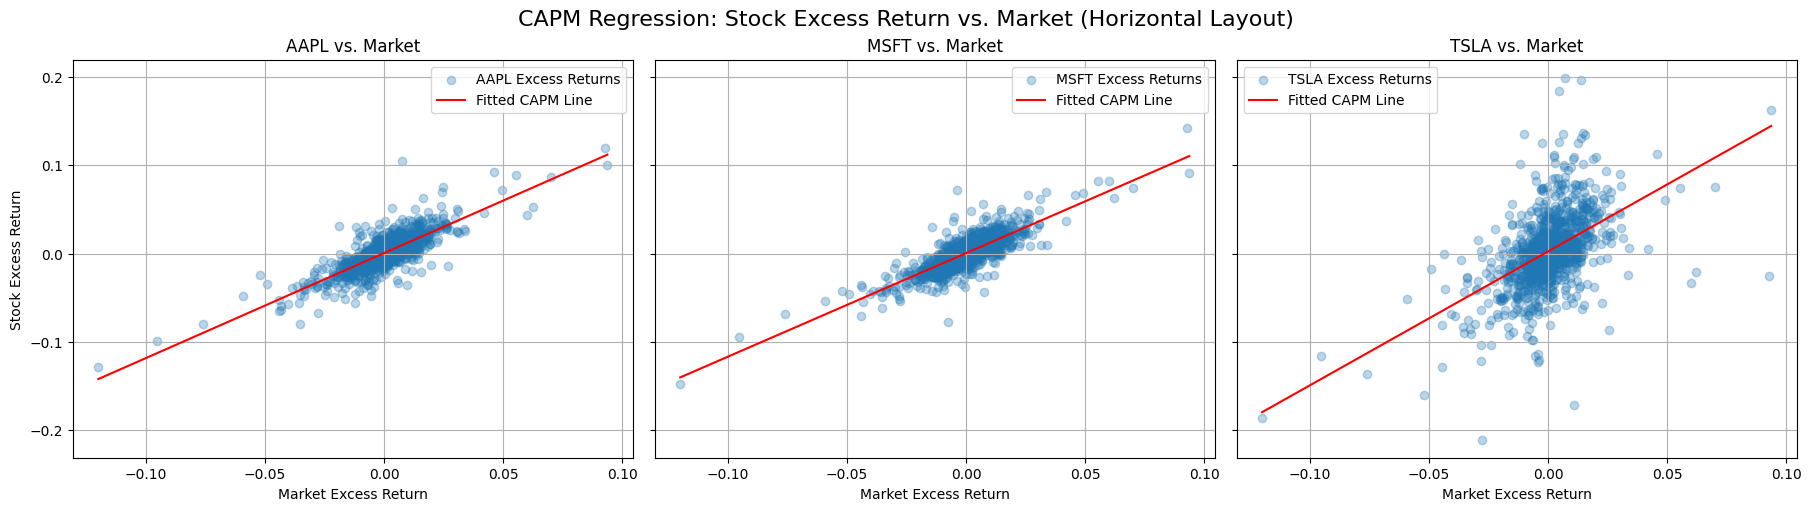

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Choose three stocks to plot
plot_stocks = ['AAPL', 'MSFT', 'TSLA']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True, constrained_layout=True)

for i, stock in enumerate(plot_stocks):
    y = excess_returns[stock]
    x = market_excess
    alpha = results[stock]['Alpha']
    beta = results[stock]['Beta']

    axes[i].scatter(x, y, alpha=0.3, label=f'{stock} Excess Returns')
    # Regression line: y = alpha + beta * x
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = alpha + beta * x_line
    axes[i].plot(x_line, y_line, color='red', label='Fitted CAPM Line')
    axes[i].set_title(f'{stock} vs. Market')
    axes[i].set_xlabel('Market Excess Return')
    if i == 0:
        axes[i].set_ylabel('Stock Excess Return')
    axes[i].legend()
    axes[i].grid(True)

plt.suptitle('CAPM Regression: Stock Excess Return vs. Market (Horizontal Layout)', fontsize=16)
plt.show()

# **Task 3**

1.   **Estimate covariance matrix of your pool of stocks of your choice​**

2.    **Build a minimized risk portfolio using your picked stocks​**


In [ ]:
#Estimate covariance matrix of your pool of stocks of your choice​

import cvxpy as cp
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt


stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "META",
          "TSLA", "JPM", "JNJ", "NVDA", "XOM"]


start_date ="2020-01-01"
end_date = "2023-12-31"

data = yf.download(stocks, start=start_date, end=end_date)["Close"]

returns=data.pct_change().dropna()
cov_matrix=returns.cov().values

# Plot covariance matrix using seaborn
plt.figure(figsize=(6, 8))
sns.set(style="whitegrid")

# Define variables

number_assets=len(stocks)
weights=cp.Variable(number_assets)

# Define Portfolio variance

portfolio_variance=cp.quad_form(weights, cov_matrix)

# Define constraints

constraints=[cp.sum(weights)==1, weights>=0]

# Define the objectve

objective=cp.Minimize(portfolio_variance)

# set up and solve the problem

problem=cp.Problem(objective, constraints)

problem.solve()

#  Extract the optimal weights

optimal_weights=weights.value

min_variance=portfolio_variance.value

# print the results
print(f"Optimal weghts are: {optimal_weights}")

print(f"Minimum variance is: {min_variance}")

/tmp/ipython-input-465174430.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start=start_date, end=end_date)["Close"]
[*********************100%***********************]  10 of 10 completed

Optimal weghts are: [-5.63479409e-20  1.35576699e-01  2.23909739e-02  7.28483410e-01
 -1.01919243e-19  1.42872726e-18  2.45240579e-19  1.62695537e-18
  4.23761350e-03  1.09311304e-01]
Minimum variance is: 0.0001455594694098232


<Figure size 600x800 with 0 Axes>

# **Task 4**

1.   **Build your Markowitz Portfolio** ​

2. **Try use different risk aversion levels in your portfolio optimization and observe how the parameter changes your optimal holdings​**

3.   **Try to include cash in your Portfolio ​**

In [ ]:
import yfinance as yf
import numpy as np
import cvxpy as cp
import pandas as pd

# -----------------------------------------------------------
# 1. Download price data and compute returns
# -----------------------------------------------------------
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "META",
          "TSLA", "JPM", "JNJ", "NVDA", "XOM"]
start_date = "2020-01-01"
end_date = "2023-12-31"

data = yf.download(stocks, start=start_date, end=end_date)["Close"]
returns = data.pct_change().dropna()

# Expected returns (mean daily) and covariance matrix
mu = returns.mean().values
cov_matrix = returns.cov().values

n = len(stocks)

# -----------------------------------------------------------
# 2. Add Cash as an additional asset
# -----------------------------------------------------------
risk_free_daily = (1 + 0.035) ** (1/252) - 1   # 3.5% per year ~ daily rate
mu_with_cash = np.append(mu, risk_free_daily)  # Append cash mean return
cov_with_cash = np.zeros((n+1, n+1)) # square matrix of zeros
cov_with_cash[:n, :n] = cov_matrix                   # Cash has zero variance

assets = stocks + ['CASH']

# -----------------------------------------------------------
# 3. Markowitz optimization with risk aversion
# -----------------------------------------------------------
def optimize_portfolio(mu, cov_matrix, risk_aversion=1.0):
    n = len(mu)
    w = cp.Variable(n)

    # Portfolio variance and return
    port_var = cp.quad_form(w, cov_matrix)
    port_return = mu @ w

    # Utility function: maximize expected return - risk_aversion * variance
    # Equivalently, minimize negative utility
    objective = cp.Maximize(port_return - risk_aversion * port_var)

    constraints = [cp.sum(w) == 1, w >= 0]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    return w.value, port_return.value, port_var.value

# -----------------------------------------------------------
# 4. Test across different risk aversion levels
# -----------------------------------------------------------
risk_aversion_levels = [0.01, 0.1, 0.5, 1, 5, 10]
results = []

for lam in risk_aversion_levels:
    weights, exp_ret, exp_var = optimize_portfolio(mu_with_cash, cov_with_cash, lam)
    results.append({
        'Risk Aversion λ': lam,
        'Expected Return': exp_ret,
        'Standard Deviation': np.sqrt(exp_var),
        'Weights': weights
    })

# Display summary
summary = pd.DataFrame([{
    'λ (Risk Aversion)': r['Risk Aversion λ'],
    'Exp. Return (%)': round(r['Expected Return']*100, 3),
    'Exp. StdDev (%)': round(r['Standard Deviation']*100, 3),
    'Cash Weight (%)': round(r['Weights'][-1]*100, 2)
} for r in results])

print(summary)

# -----------------------------------------------------------
# 5. Print detailed portfolio holdings for one λ example
# -----------------------------------------------------------
print("\nHoldings for λ=1:")
for name, weight in zip(assets, results[3]['Weights']):  # λ=1 is index 3
    print(f"{name}: {weight*100:.2f}%")


/tmp/ipython-input-2623395047.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start=start_date, end=end_date)["Close"]
[*********************100%***********************]  10 of 10 completed


   λ (Risk Aversion)  Exp. Return (%)  Exp. StdDev (%)  Cash Weight (%)
0               0.01            0.307            4.290             0.00
1               0.10            0.307            4.290             0.00
2               0.50            0.289            3.404            -0.00
3               1.00            0.284            3.291             0.00
4               5.00            0.082            0.829            70.90
5              10.00            0.048            0.414            85.45

Holdings for λ=1:
AAPL: 0.00%
MSFT: 0.00%
GOOGL: 0.00%
AMZN: 0.00%
META: 0.00%
TSLA: 0.00%
JPM: 0.00%
JNJ: 59.78%
NVDA: 40.22%
XOM: 0.00%
CASH: 0.00%


# **Task 5**



1.   **Add transaction cost term to Markowitz Portfolio Model**
2.   **You can use $0$ as initial position or you a random vector position**
3.   **For transaction cost efficient, you can use 2bps of trade size in USD**
2.   **You will need to multiply the risk/return term by holding period to convert unit to USD, so that unit of all terms in the objective function is consistent with each other**





In [ ]:
import yfinance as yf
import numpy as np
import cvxpy as cp
import pandas as pd

# 1. SETTINGS AND DATA
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "JPM", "JNJ", "NVDA", "XOM"]
start_date = "2020-01-01"
end_date = "2023-12-31"
holding_period_days = 252  # e.g. 1 year


# Download & prepare returns
prices = yf.download(stocks, start=start_date, end=end_date)["Close"]
returns = prices.pct_change().dropna()
mu = returns.mean().values           # Average daily returns
cov = returns.cov().values           # Covariance matrix of returns


# 2. INITIAL & FINAL PORTFOLIO POSITIONS
initial_wealth = 1000000           # Assume $1M to allocate
initial_position = np.zeros(len(stocks)) # Start with 0 holdings, can change to random if desired


# 3. TRANSACTION COST PARAMETER
tc_bps = 2                           # Transaction cost: 2 basis points = 0.0002 per dollar
tc = tc_bps / 10000                 # Convert bps to decimal


# 4. CVXPY VARIABLES
n = len(stocks)
w = cp.Variable(n)                   # Portfolio weights (final)
dollar_final = w * initial_wealth    # Invested dollar amount in each asset

# 5. OBJECTIVE TERMS
# 5.1. Expected return over holding period, in USD
# Return per USD = dot(mu, w) per day; Multiply by holding period and wealth for USD
expected_reward_usd = holding_period_days * initial_wealth * mu @ w

# 5.2. Risk (variance) over holding period, in USD^2
port_var = cp.quad_form(w, cov)
risk_usd2 = holding_period_days * (initial_wealth ** 2) * port_var

# 5.3. Transaction cost for moving from initial_position to w: tc * sum(abs(final-initial)) * initial_wealth
# Here, transaction cost is proportional to traded value
trade_size_usd = cp.abs(dollar_final - initial_position * initial_wealth)
trans_cost_usd = tc * cp.sum(trade_size_usd)

# 6. PORTFOLIO OPTIMIZATION (max expected return minus costs)
risk_aversion = 3e-2     # Chosen to balance USD scale terms (try values ~1e-6 to 1e-5)
objective = cp.Maximize(
    expected_reward_usd
    - risk_aversion * risk_usd2
    - trans_cost_usd
)

# Constraints: fully invested (sum weights = 1), long-only (no shorting)
constraints = [cp.sum(w) == 1, w >= 0]

problem = cp.Problem(objective, constraints)
problem.solve()

# 7. OUTPUT
print("Optimal weights:", w.value)
print("Trade (USD):", (w.value - initial_position) * initial_wealth)
print("Transaction cost ($):", tc * np.sum(np.abs((w.value - initial_position) * initial_wealth)))
print("Expected return for holding period ($):", holding_period_days * initial_wealth * mu @ w.value)

/tmp/ipython-input-1965224680.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start=start_date, end=end_date)["Close"]
[*********************100%***********************]  10 of 10 completed


Optimal weights: [1.81587786e-11 1.35560007e-01 2.24044769e-02 7.28452028e-01
 9.47624457e-12 1.69551004e-11 1.79898770e-11 1.58527155e-11
 4.26328763e-03 1.09320200e-01]
Trade (USD): [1.81587786e-05 1.35560007e+05 2.24044769e+04 7.28452028e+05
 9.47624457e-06 1.69551004e-05 1.79898770e-05 1.58527155e-05
 4.26328763e+03 1.09320200e+05]
Transaction cost ($): 200.00000000213996
Expected return for holding period ($): 105015.5027591099


# **Task 6**

### **Data Cleaning**

In [ ]:
import yfinance as yf
import pandas as pd
import requests
url = "https://www.slickcharts.com/sp500"
tables = pd.read_html(requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text)
df = tables[0]  # contains Rank, Company, Symbol, Weight, Price, Chg
df.to_csv("sp500_weights.csv", index=False)
df

/tmp/ipython-input-1509106777.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text)


,#,Company,Symbol,Weight,Price,Chg,% Chg
0,1,Nvidia,NVDA,7.84%,198.05,9.90,(5.26%)
1,2,Apple Inc.,AAPL,6.48%,269.68,1.21,(0.45%)
2,3,Microsoft,MSFT,6.10%,504.98,8.16,(1.64%)
3,4,Amazon,AMZN,4.32%,248.55,4.14,(1.69%)
4,5,Alphabet Inc. (Class A),GOOGL,2.94%,290.19,11.36,(4.07%)
...,...,...,...,...,...,...,...
498,499,Match Group,MTCH,0.01%,33.32,0.45,(1.35%)
499,500,Solstice Advanced Materials Inc.,SOLS,0.01%,46.95,-0.54,(-1.14%)
500,501,Molina Healthcare,MOH,0.01%,140.57,-11.49,(-7.56%)
501,502,Mohawk Industries,MHK,0.01%,107.44,-1.25,(-1.15%)


In [ ]:
df.columns

Index(['#', 'Company', 'Symbol', 'Weight', 'Price', 'Chg', '% Chg'], dtype='object')

In [ ]:
df_new = df.drop('#', axis=1)
df_new

,Company,Symbol,Weight,Price,Chg,% Chg
0,Nvidia,NVDA,7.84%,198.05,9.90,(5.26%)
1,Apple Inc.,AAPL,6.48%,269.68,1.21,(0.45%)
2,Microsoft,MSFT,6.10%,504.98,8.16,(1.64%)
3,Amazon,AMZN,4.32%,248.55,4.14,(1.69%)
4,Alphabet Inc. (Class A),GOOGL,2.94%,290.19,11.36,(4.07%)
...,...,...,...,...,...,...
498,Match Group,MTCH,0.01%,33.32,0.45,(1.35%)
499,Solstice Advanced Materials Inc.,SOLS,0.01%,46.95,-0.54,(-1.14%)
500,Molina Healthcare,MOH,0.01%,140.57,-11.49,(-7.56%)
501,Mohawk Industries,MHK,0.01%,107.44,-1.25,(-1.15%)


In [ ]:
# Filtering for stocks of interest

Data = df_new[df_new['Symbol'].isin(["AAPL", "MSFT", "GOOGL", "AMZN", "META",
                                     "TSLA", "JPM", "JNJ", "NVDA", "XOM"])]
Data

,Company,Symbol,Weight,Price,Chg,% Chg
0,Nvidia,NVDA,7.84%,198.05,9.90,(5.26%)
1,Apple Inc.,AAPL,6.48%,269.68,1.21,(0.45%)
2,Microsoft,MSFT,6.10%,504.98,8.16,(1.64%)
3,Amazon,AMZN,4.32%,248.55,4.14,(1.69%)
4,Alphabet Inc. (Class A),GOOGL,2.94%,290.19,11.36,(4.07%)
7,Meta Platforms,META,2.59%,632.12,10.41,(1.68%)
8,"Tesla, Inc.",TSLA,2.41%,445.70,16.18,(3.77%)
10,JPMorgan Chase,JPM,1.41%,317.66,3.45,(1.10%)
15,ExxonMobil,XOM,0.81%,118.07,0.85,(0.72%)
19,Johnson & Johnson,JNJ,0.74%,187.75,1.18,(0.63%)


In [ ]:
import numpy as np

# Benchmark weights

Benchmark_weights = (
    Data['Weight']
    .str.replace('%', '', regex=False)   # remove the '%' symbol
    .astype(float)                       # convert to float
    .to_numpy()                          # convert to NumPy array
)
Benchmark_weights

array([7.84, 6.48, 6.1 , 4.32, 2.94, 2.59, 2.41, 1.41, 0.81, 0.74])

In [ ]:
# Benchmarks Symbols
Benchmark_Symbols=Data['Symbol'].to_list()
Benchmark_Symbols

['NVDA', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'JPM', 'XOM', 'JNJ']

In [ ]:
# Original data
Benchmark_weights = np.array([7.55, 6.54, 6.09, 4.31, 2.87, 2.58, 2.35, 1.41, 0.81, 0.74])
Benchmark_Symbols = np.array(['NVDA', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'JPM', 'XOM', 'JNJ'])

""" Desired new order, I want the weights in the Benchmark_weights to be arrange in suvh a way that the alignment
follow that of the previous list of stock we had in the previous exercise:
["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "JPM", "JNJ", "NVDA", "XOM"]

"""
new_order = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "JPM", "JNJ", "NVDA", "XOM"]

# Create a mapping from symbol → value
symbol_to_value = dict(zip(Benchmark_Symbols, Benchmark_weights))

# Reorder according to new_order
reordered_Benchmark_weights = np.array([symbol_to_value[s] for s in new_order])

print(reordered_Benchmark_weights)

[6.54 6.09 2.87 4.31 2.58 2.35 1.41 0.74 7.55 0.81]


In [ ]:
# We need to multiply to reordered_Benchmark_weights by 0.01 since it was percentage at the begining
reordered_Benchmark_weights=reordered_Benchmark_weights*0.01
reordered_Benchmark_weights

array([0.0654, 0.0609, 0.0287, 0.0431, 0.0258, 0.0235, 0.0141, 0.0074,
       0.0755, 0.0081])

# **Building our active Portfolio**

In [ ]:
# 1. SETTINGS AND DATA
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "JPM", "JNJ", "NVDA", "XOM"]
start_date = "2020-01-01"
end_date = "2023-12-31"
holding_period_days = 252  # e.g. 1 year


# Download & prepare returns
prices = yf.download(stocks, start=start_date, end=end_date)["Close"]
returns = prices.pct_change().dropna()
mu = returns.mean().values           # Average daily returns
cov = returns.cov().values           # Covariance matrix of returns


# 2. INITIAL & FINAL PORTFOLIO POSITIONS
initial_wealth = 1000000           # Assume $1M to allocate
initial_position = np.zeros(len(stocks)) # Start with 0 holdings, can change to random if desired


# 3. TRANSACTION COST PARAMETER
tc_bps = 2                           # Transaction cost: 2 basis points = 0.0002 per dollar
tc = tc_bps / 10000                 # Convert bps to decimal


# 4. CVXPY VARIABLES
n = len(stocks)
w = cp.Variable(n)-Benchmark_weights                   # Active Portfolio weights (final)
dollar_final = w * initial_wealth    # Invested dollar amount in each asset

# 5. OBJECTIVE TERMS
# 5.1. Expected return over holding period, in USD
# Return per USD = dot(mu, w) per day; Multiply by holding period and wealth for USD
expected_reward_usd = holding_period_days * initial_wealth * mu @ w

# 5.2. Risk (variance) over holding period, in USD^2
port_var = cp.quad_form(w, cov)
risk_usd2 = holding_period_days * (initial_wealth ** 2) * port_var

# 5.3. Transaction cost for moving from initial_position to w: tc * sum(abs(final-initial)) * initial_wealth
# Here, transaction cost is proportional to traded value
trade_size_usd = cp.abs(dollar_final - initial_position * initial_wealth)
trans_cost_usd = tc * cp.sum(trade_size_usd)

# 6. PORTFOLIO OPTIMIZATION (max expected return minus costs)
risk_aversion = 3e-2     # Chosen to balance USD scale terms (try values ~1e-6 to 1e-5)
objective = cp.Maximize(
    expected_reward_usd
    - risk_aversion * risk_usd2
    - trans_cost_usd
)

# Constraints: fully invested (sum weights = 1), long-only (no shorting)
constraints = [cp.sum(w) == 1, w >= 0]

problem = cp.Problem(objective, constraints)
problem.solve()

# 7. OUTPUT
print("Optimal Active  weights:", w.value)
print("Trade (USD):", (w.value - initial_position) * initial_wealth)
print("Transaction cost ($):", tc * np.sum(np.abs((w.value - initial_position) * initial_wealth)))
print("Expected return for holding period ($):", holding_period_days * initial_wealth * mu @ w.value)

/tmp/ipython-input-3092621906.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start=start_date, end=end_date)["Close"]
[*********************100%***********************]  10 of 10 completed

Optimal Active  weights: [5.87341991e-06 1.35547541e-01 2.23794416e-02 7.28450186e-01
 3.43814588e-06 1.37943853e-05 5.09512619e-06 1.76548213e-05
 4.25836631e-03 1.09318610e-01]
Trade (USD): [5.87341991e+00 1.35547541e+05 2.23794416e+04 7.28450186e+05
 3.43814588e+00 1.37943853e+01 5.09512619e+00 1.76548213e+01
 4.25836631e+03 1.09318610e+05]
Transaction cost ($): 200.00000022354152
Expected return for holding period ($): 105021.91954696632


# **Task 7**
### **Use PCA for estimation of covariance matrix, then use it as input for portfolio construction model**​

## **Setting up**

In [ ]:
import numpy as np       # For numerical operations
import pandas as pd      # For data manipulation
import yfinance as yf    # To fetch financial data
from sklearn.decomposition import PCA  # For principal component analysis
import matplotlib.pyplot as plt         # For plotting
import cvxpy as cp      # For portfolio optimization

""" I increased the number of stocks because the idea PCA is generally used when we have sufficiently high number of stocks, making
it difficult to estimate the covariance matrix amon stocks """

stocks = [  # Expanded universe for a meaningful PCA
    "AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "JPM", "JNJ", "NVDA", "XOM",
    "BAC", "WMT", "V", "DIS", "HD", "MA", "INTC", "IBM", "PFE", "KO",
    "UNH", "PG", "CSCO", "PEP", "CVX", "MCD"
]
start_date = "2020-01-01"
end_date = "2023-12-31"
prices = yf.download(stocks, start=start_date, end=end_date)["Close"]

# Computing returns

returns = prices.pct_change().dropna()


/tmp/ipython-input-1683485498.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start=start_date, end=end_date)["Close"]
[*********************100%***********************]  26 of 26 completed


### **PCA and Scree Plot**

In [ ]:
pca = PCA()
pca.fit(returns)  # Fit PCA on standardized return data

PCA()

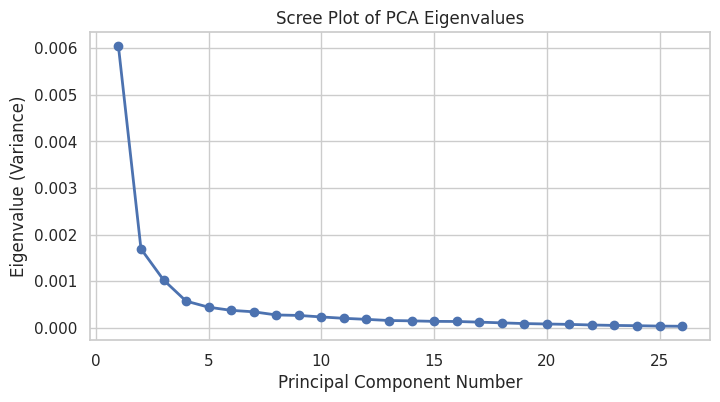

In [ ]:
# 2. PCA and Scree Plot to Select Number of Components
pca = PCA()
pca.fit(returns)
eigenvalues = pca.explained_variance_
plt.figure(figsize=(8,4))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'o-', lw=2)
plt.xlabel("Principal Component Number")
plt.ylabel("Eigenvalue (Variance)")
plt.title("Scree Plot of PCA Eigenvalues")
plt.grid(True)
plt.show()

In [ ]:
# 3. Choose n_components based on scree plot
n_components = 5  # Example: choose based on elbow in plot (adjust for your case)
pca_reduced = PCA(n_components=n_components)
pca_reduced.fit(returns)
explained_var = pca_reduced.explained_variance_
components = pca_reduced.components_
pca_cov = np.dot(components.T * explained_var, components)  # Low-rank systematic covariance


# **IDIOSYNCRATIC VARIANCE: each asset's leftover variance**

# Financial Interpretation: Adding Idiosyncratic Variance to PCA Covariance

## Motivation
The covariance matrix is central to portfolio theory: it measures how asset returns move together and quantifies both overall and asset-specific risks. With many assets and limited data, estimating the full covariance matrix can be noisy. Principal Component Analysis (PCA) helps summarize the major sources of "systematic" risk—those driven by broad factors affecting market-wide co-movements.

## Systematic and Idiosyncratic Risk
PCA identifies a few principal components (factors) that explain most of the covariance structure among assets. These are called *systematic risks* (such as market-wide or sector-wide effects). In addition, each individual asset possesses extra risk not explained by these shared factors—this is *idiosyncratic risk*.

Mathematically, this is expressed as:

$$
\Sigma = \Lambda \operatorname{Var}(F) \Lambda^T + \Psi
$$
where:
- $ \Lambda \operatorname{Var}(F) \Lambda^T $ is the systematic risk from the principal components (factor model),
- $ \Psi $ is a diagonal matrix containing idiosyncratic variance for each asset.

## Why Add the Diagonal Matrix of Idiosyncratic Variance?
If you use only the PCA (low-rank) covariance, you overlook the unique risk of each asset. This omission can:
- **Underestimate total portfolio risk:** making risky assets seem artificially safe.
- **Lead to unreliable allocations:** over-allocating to assets whose risk is ignored.
- **Represent an incomplete risk picture:** because real‐world asset returns have both systematic and idiosyncratic sources of variability.

Including the idiosyncratic variance as a diagonal matrix:
1. **Completes** the covariance estimate with all major and minor risk sources.
2. **Balances** systematic trends (shared risks) and unique, non-systematic risks in your optimization.
3. Leads to **more realistic, diversified, and robust** portfolio recommendations, aligning with financial theory and best practices.

## Practical Example for Portfolio Construction
When building your portfolio:
- Use PCA to extract the main risk drivers.
- Compute residuals (the difference between actual returns and PCA model fit) to estimate each asset's idiosyncratic risk.
- Add the diagonal matrix constructed from these residual variances ($ \Psi $) to the PCA covariance ($ \Sigma_{\text{PCA}} $), ensuring all sources of risk are captured.

**Summary:** This two-part construction makes your portfolio optimization risk‐aware, avoids over-aggressive bets, and results in more stable investment outcomes.


In [ ]:
# IDIOSYNCRATIC VARIANCE: each asset's leftover variance
residuals = returns.values - pca_reduced.inverse_transform(pca_reduced.transform(returns))
idio_vars = np.var(residuals, axis=0)     # One variance per asset
idio_cov = np.diag(idio_vars)             # Form as diagonal matrix

# Final Covariance Matrix: systematic + idiosyncratic
cov_est = pca_cov + idio_cov

# **Portfolio Optimization Using Improved Covariance Matrix**

In [ ]:
# 4. Portfolio Optimization Using Improved Covariance Matrix
n = len(stocks)
mu = returns.mean().values
initial_wealth = 1_000_000
initial_position = np.zeros(n)
tc_bps = 2          # 2 basis points
tc = tc_bps/10000
w = cp.Variable(n)
dollar_final = w * initial_wealth
holding_period_days = 252
expected_reward_usd = holding_period_days * initial_wealth * mu @ w
port_var = cp.quad_form(w, cov_est)    # Use improved covariance
risk_usd2 = holding_period_days * (initial_wealth ** 2) * port_var
trade_size_usd = cp.abs(dollar_final - initial_position * initial_wealth)
trans_cost_usd = tc * cp.sum(trade_size_usd)
risk_aversion = 3e-2
objective = cp.Maximize(expected_reward_usd - risk_aversion * risk_usd2 - trans_cost_usd)
constraints = [cp.sum(w) == 1, w >= 0]
problem = cp.Problem(objective, constraints)
problem.solve()

np.float64(-897744669.290046)

In [ ]:
print("Optimal weights:", w.value)
print("Trade size (USD):", (w.value - initial_position) * initial_wealth)
print("Transaction cost ($):", tc * np.sum(np.abs((w.value - initial_position) * initial_wealth)))
print("Expected return for holding period ($):", holding_period_days * initial_wealth * mu @ w.value)

Optimal weights: [4.83889840e-09 7.76523081e-02 3.08498785e-09 3.03688625e-09
 2.37103492e-09 4.85584667e-09 5.97570163e-09 3.55943746e-09
 1.96663878e-09 2.91549031e-09 3.02548857e-01 3.25516341e-09
 7.58607125e-02 4.31911375e-09 5.39161500e-02 4.79923952e-09
 5.15969669e-09 3.26242493e-09 1.30125311e-09 4.39098873e-02
 1.23299966e-01 1.99508987e-09 9.94136928e-10 4.59094912e-09
 2.35264761e-01 8.75472953e-02]
Trade size (USD): [4.83889840e-03 7.76523081e+04 3.08498785e-03 3.03688625e-03
 2.37103492e-03 4.85584667e-03 5.97570163e-03 3.55943746e-03
 1.96663878e-03 2.91549031e-03 3.02548857e+05 3.25516341e-03
 7.58607125e+04 4.31911375e-03 5.39161500e+04 4.79923952e-03
 5.15969669e-03 3.26242493e-03 1.30125311e-03 4.39098873e+04
 1.23299966e+05 1.99508987e-03 9.94136928e-04 4.59094912e-03
 2.35264761e+05 8.75472953e+04]
Transaction cost ($): 200.00000001465227
Expected return for holding period ($): 105568.62464581325


# **Results obtained**

In [ ]:
import pandas as pd
# Example for weights and trades (replace with real results)
stock_names = stocks
weights = w.value
trades = (w.value - initial_position) * initial_wealth
summary_df = pd.DataFrame({"Stock": stock_names, "Optimal Weight": weights, "Trade Size (USD)": trades})
print(summary_df)
# Results summary for metrics
metrics_df = pd.DataFrame({"Metric": ["Transaction Cost ($)", "Expected Return for Holding Period ($)", "Holding Period (days)", "Initial investment ($)"], "Value": [tc * np.sum(np.abs((w.value - initial_position) * initial_wealth)),  holding_period_days * initial_wealth * mu @ w.value, 252, 1_000_000]})
print(metrics_df)


    Stock  Optimal Weight  Trade Size (USD)
0    AAPL    4.838898e-09          0.004839
1    MSFT    7.765231e-02      77652.308091
2   GOOGL    3.084988e-09          0.003085
3    AMZN    3.036886e-09          0.003037
4    META    2.371035e-09          0.002371
5    TSLA    4.855847e-09          0.004856
6     JPM    5.975702e-09          0.005976
7     JNJ    3.559437e-09          0.003559
8    NVDA    1.966639e-09          0.001967
9     XOM    2.915490e-09          0.002915
10    BAC    3.025489e-01     302548.856728
11    WMT    3.255163e-09          0.003255
12      V    7.586071e-02      75860.712519
13    DIS    4.319114e-09          0.004319
14     HD    5.391615e-02      53916.149973
15     MA    4.799240e-09          0.004799
16   INTC    5.159697e-09          0.005160
17    IBM    3.262425e-09          0.003262
18    PFE    1.301253e-09          0.001301
19     KO    4.390989e-02      43909.887332
20    UNH    1.233000e-01     123299.966345
21     PG    1.995090e-09       